<div align="center">
    <h1> MTMW14: Numerical Modelling of Atmosphere and Oceans</h1>
<h2> Project 1: Recharge Oscillator Model for ENSO</h2>
</div>

### Introduction
A Recharge Oscillator Model (ROM) is given by Jin (1997b) for modelling Seas Surface Temperature (SST) and thermocline depth anamalies  caused by the El Nino Southern Oscillation (ENSO) in the Pacific ocean along the equator, as- 
\begin{equation}
    \frac{dh_w}{dt} = -rh_w - \alpha bT_E - \alpha\xi_1
\end{equation}
\begin{equation}
    \frac{dT_E}{dt} = RT_E + \gamma h_w - e_n(h_1+bT_E)^3 + \gamma\xi_1 + \xi_2,
\end{equation}
Here $T_w$ is the SST anamaly and $h_w$ is the thermocline depth anomaly.
I have used the $4^{th}$ order Runge-Kutta time scheme to impelment the above ROM. All temperature, depth and time values are non-dimentionalised before inputing into the above model. They are dimentionalised again before making the plots.

### Runge-Kutta Time Scheme
Runge-Kutta is a 4th order iterative scheme. It is a highy accurate scheme and allows the use of longer time steps, but is computatiionaly expensive. Since in this project we will use a range of time-steps, but is not complecated enough to demand high computational cost, I have chosen to use this scheme. As seen in Task A, it is also highly stable. See Appendix for detailed formulation and implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Constants import *
from funcs import *

### Task A: The neutral linear (deterministic) ROM

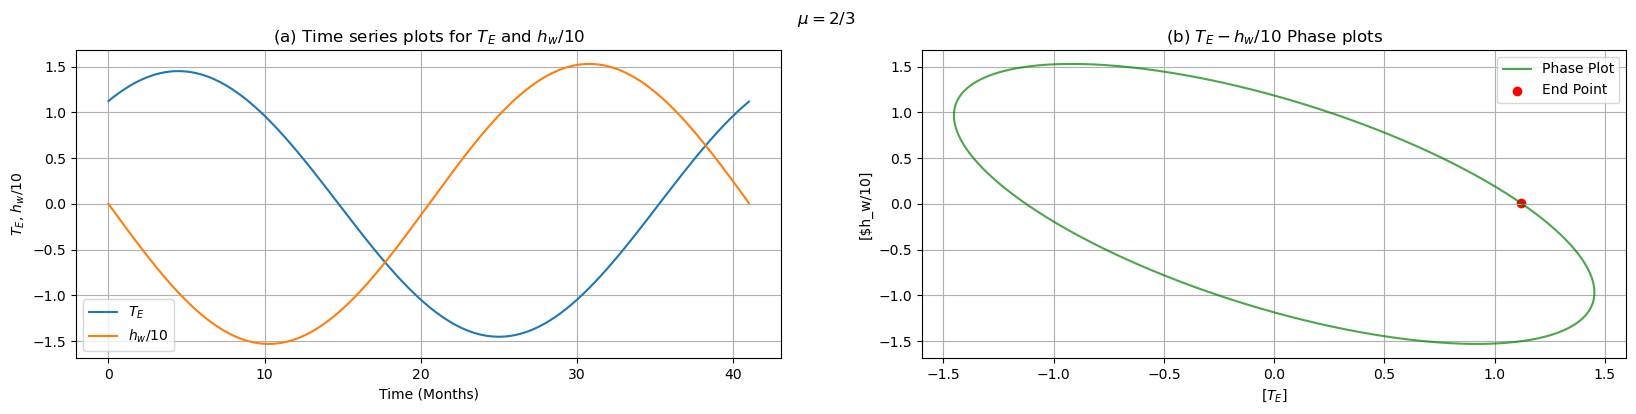

In [2]:
endTime=(2*np.pi/np.sqrt(3/32)) #dimentionalised
nt=1000
dt=endTime/nt
mu=mu_c
E1,E2=0,0
en=0
time=np.linspace(0,endTime,nt) *t_nd # time array, dimentionalised
#plots
Te,hw=RKplots(time,'$\mu=2/3$',nt,dt,T_nd,h_nd,t_nd,E1,E2,mu_c,0,en)

We can see from the time series plot that $T_E$ and $h_w$ are periodic when the coupling coefficient, $\mu=\mu_c=2/3$ and we have no external forcings($\xi_1, \xi_2 =0$) or non-linearity($e_n=0$). This is also evident from the $T_E-h_w$ phase plot. 
The initial conditions are $T=1.125 K$ and $h=0 m$. These initial conditions are used for all parts in this project. When oscillations are created by giving intial perturbation only to $T_E$ in this way, $h_w$ oscillations lag behind. As stated by Jin (1997b), there is no growth in either anomalies and they oscillate uniformly. The period of oscillation plotted above is $\approx 41 months$, which is consistent with Jin (1997a).

#### Stability analysis
I have checked the stability numerically by running the above model for 100 time periods, and we can see below that RK4 remains stable for both variables. Thus the choice of time scheme is justified.

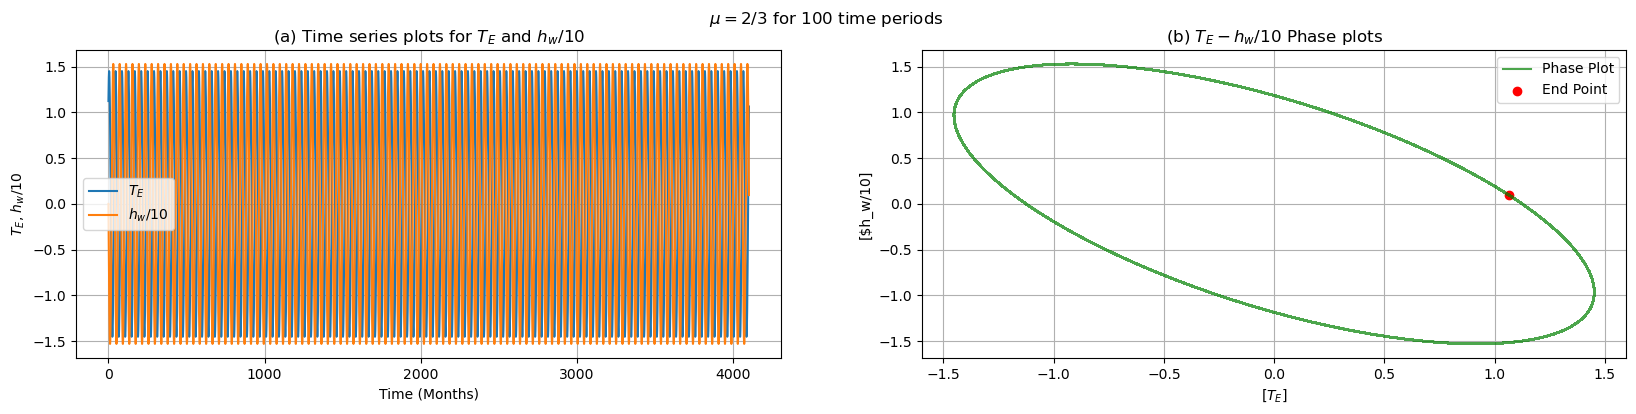

In [3]:
endTime=(2*np.pi/np.sqrt(3/32))*100 #dimentionalised
nt=1000*10
dt=endTime/nt
time=np.linspace(0,endTime,nt) *t_nd # time array, dimentionalised
Te,hw=RKplots(time,'$\mu=2/3$ for 100 time periods',nt,dt,T_nd,h_nd,t_nd,0,0,mu_c,0,en)

### Task B  Testing ROM behaviour around sub-critical and super-critical settings of the coupling parameter


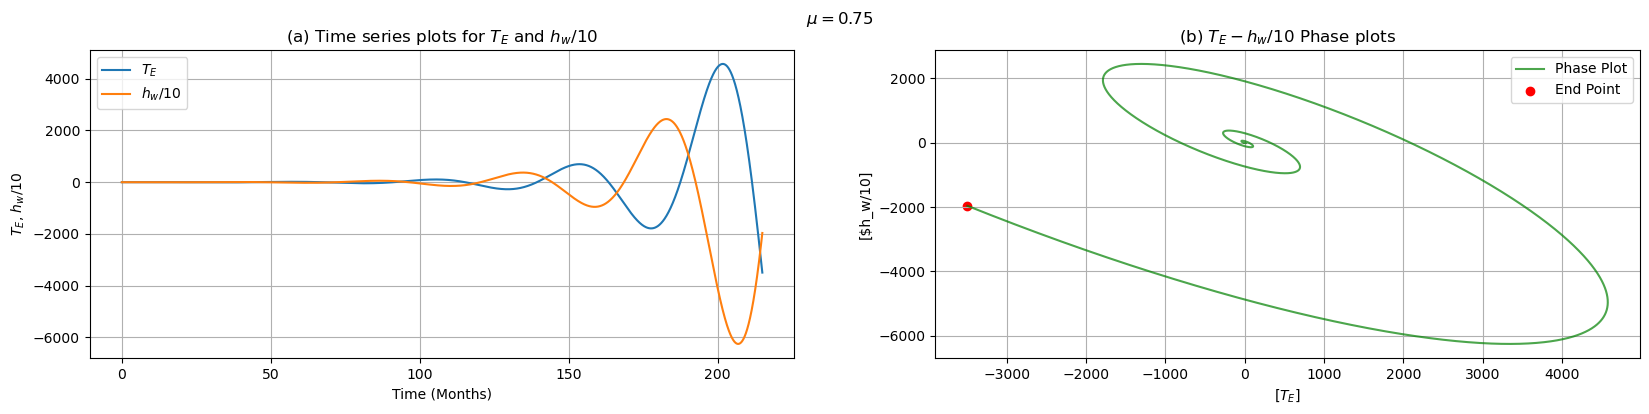

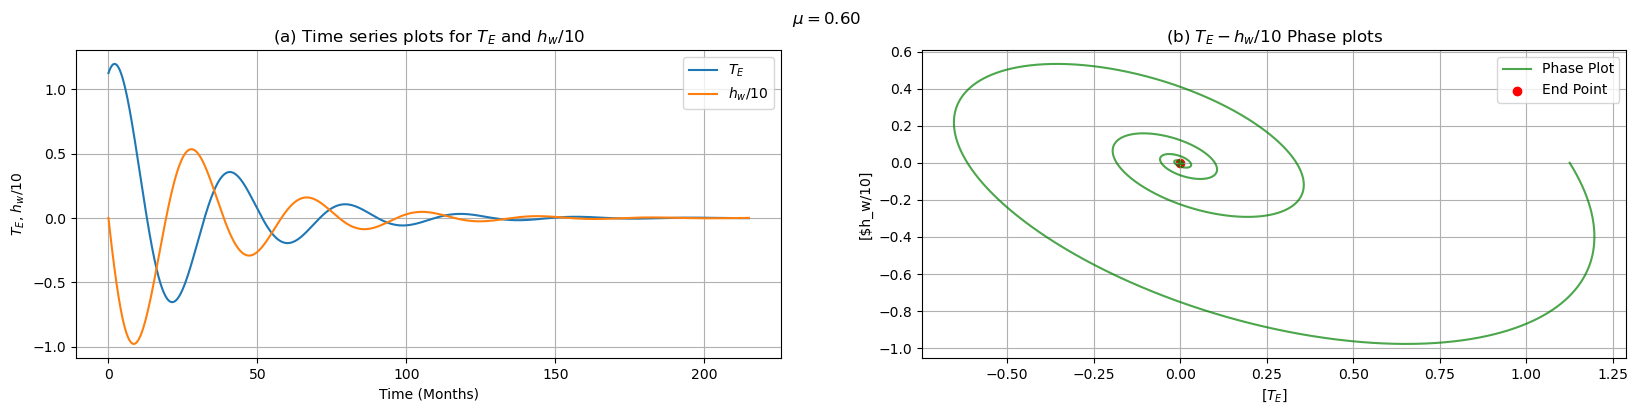

In [4]:
endTime=215/t_nd
dt=endTime/nt
time=np.linspace(0,endTime,nt) *t_nd # time array, dimentionalised
mu=0.75
Te1,hw1=RKplots(time,'$\mu=0.75$',nt,dt,T_nd,h_nd,t_nd,E1,E2,mu,0,en)
mu=0.60
Te2,hw2=RKplots(time,'$\mu=0.60$',nt,dt,T_nd,h_nd,t_nd,E1,E2,mu,0,en)

We run the model with same parameters as part A, except we test it for a super-critical and and a sub-critical value of $\mu$, i.e., $\mu=0.75$ and $\mu=0.60$ respectively. For $\mu>\mu_c$, the amplitudes blow-up, i.e., becomes self-exciting (explored in more detail in Task D) and for  $\mu<\mu_c$, the amplitudes decay. But in both cases, the anomalies remain in a harmonic motion. The period of oscillation has increased in both cases.

### Task C: Extending ROM to include the impact of non-linearity

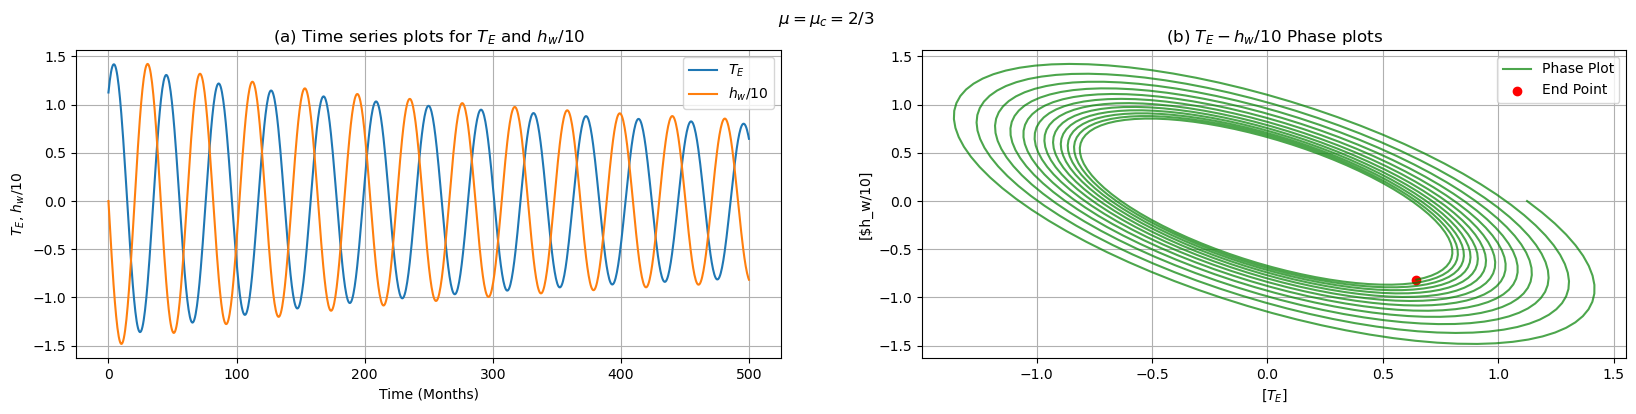

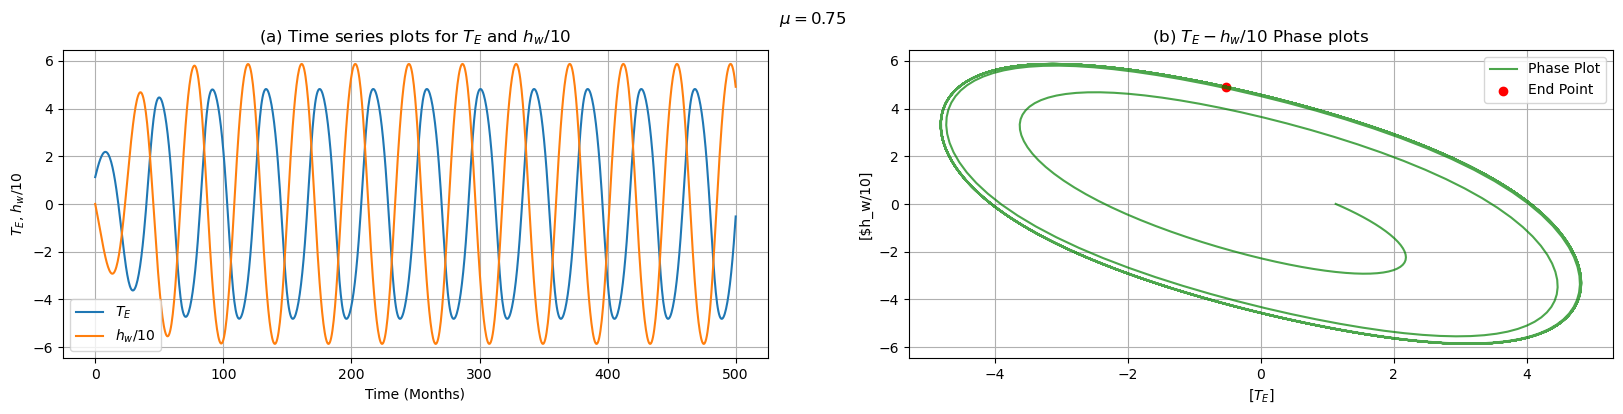

In [5]:
endTime=500/t_nd
nt=1000
dt=endTime/nt
time=np.linspace(0,endTime,nt) *t_nd # time array, dimentionalised
en=0.1
mu=2/3
Te1,hw1=RKplots(time,'$\mu=\mu_c=2/3$',nt,dt,T_nd,h_nd,t_nd,E1,E2,mu,0,en)
mu=0.75
Te2,hw2=RKplots(time,'$\mu=0.75$',nt,dt,T_nd,h_nd,t_nd,E1,E2,mu,0,en)

We run the model with non-linearity introduced ($e_n=0.1$). For $\mu=\mu_c$,comparing with Task A, we see that the non-linearity make the anamalies decay slowly. When $\mu$ is increased to a super-critical value of $0.75$, the anomalies show an inlitial growth, and then oscilate with uniform amplitudes. But amplitude incease for $h_w$ is larger than that for $T_E$. As seen from Equation (2) above, making $e_n=0.1$ makes the growth rate a cubic function og $T_E$ and $h_w$ causing a decay or growth. As stated by Jin (1997a), this non-linearity caps the linear growth, previously seen in Tast B. This is becasue of thermocline feedback, i.e., a huge variation in $h_w$ will not cause a similar variation in $T_E$ and vice-a-verca due to the now non-linear relationshio between them (Jin, 1997a).

### Task D:  Test the self-excitation hypotheses

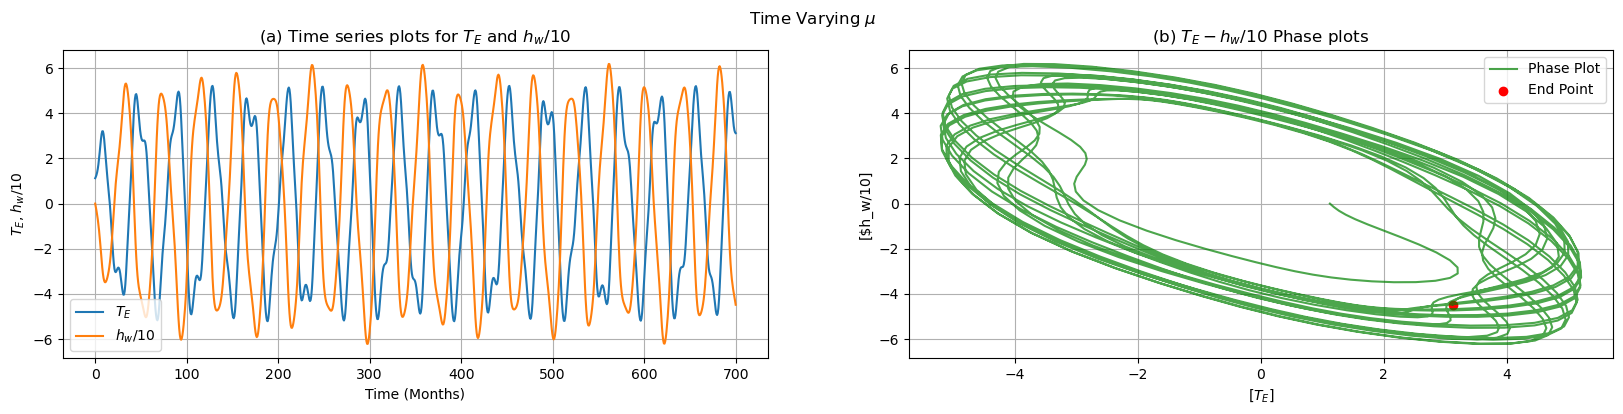

In [6]:
endTime=700/t_nd
nt=1000
dt=endTime/nt
time=np.linspace(0,endTime,nt) *t_nd # time array, dimentionalised
mu_0=0.75
Te,hw=RKplots(time,'Time Varying $\mu$',nt,dt,T_nd,h_nd,t_nd,E1,E2,mu,mu_0,en,varymu=True,varyE1=False)

We test the self-excitation hypothesis by introducing an annual forcing by varying $\mu$ in an annual cycle as-
\begin{equation}
    \mu = \mu_0\left(1+\mu_{ann}\cos\left(\frac{2\pi t}{\tau} - \frac{5\pi}{6}\right)\right)
\end{equation}
, where the period of forcing is $\tau=12 months$, $e_n=0.1$, $\mu_0=0.75$ and $\mu_{ann}=0.2$. In the SST anomaly, $T_E$, time series plot we can see wiggles at regular intervals. These are also visible in the phase plot. They are a result of the annual forcing. The time series of both anomalies are still periodic, but with a time period greater than that of the annual forcing. After an intial rise, growth for $T_E$ and $h_w$ is capped, similar to that seen in Task C. The $h_w$ amplitude also shows an oscillation every 3 time periods.

### Task E: Test the stochastic initiation hypotheses by adding noisy wind forcing to the linear model

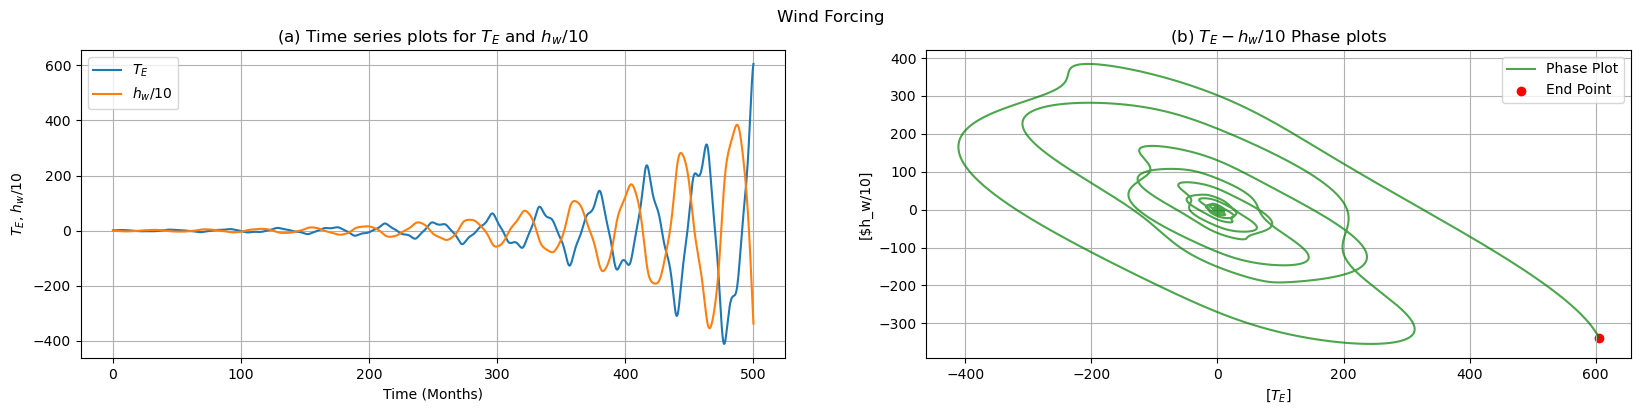

In [7]:
endTime=500/t_nd
dt=(1/30)/t_nd
nt=int(endTime/dt)
time=np.linspace(0,endTime,nt) *t_nd # time array, dimentionalised
en=0
mu_0=0.69
Te,hw=RKplots(time,'Wind Forcing',nt,dt,T_nd,h_nd,t_nd,E1,E2,mu,mu_0,en,varymu=True,varyE1=True)

We introduce an annual stochastic forcing in the form of noisy wind stres forcing-
\begin{equation}
    \xi_1 =f_{ann}\cos\left(\frac{2\pi t}{\tau}\right) + f_{ran} W \frac{\tau_{cor}}{\Delta t}
\end{equation}
, where $W$ is a random number between -1 and 1. Nonlinearity is removed($e_n=0$) and $\mu_0$ is chosen as $0.69$. Since we are in the super-critical region, there is a linear growth in amplitude, similar to Task B, and since $e_n=0$, there is no cap on the growth of the anomalies, unlike Tasks C,D. The annual forcing creates wiggles in $T_E$ similar to Task D, and the random wind forcing creates ....

### Task F: Testing the non-linearity and the stochastic forcing together

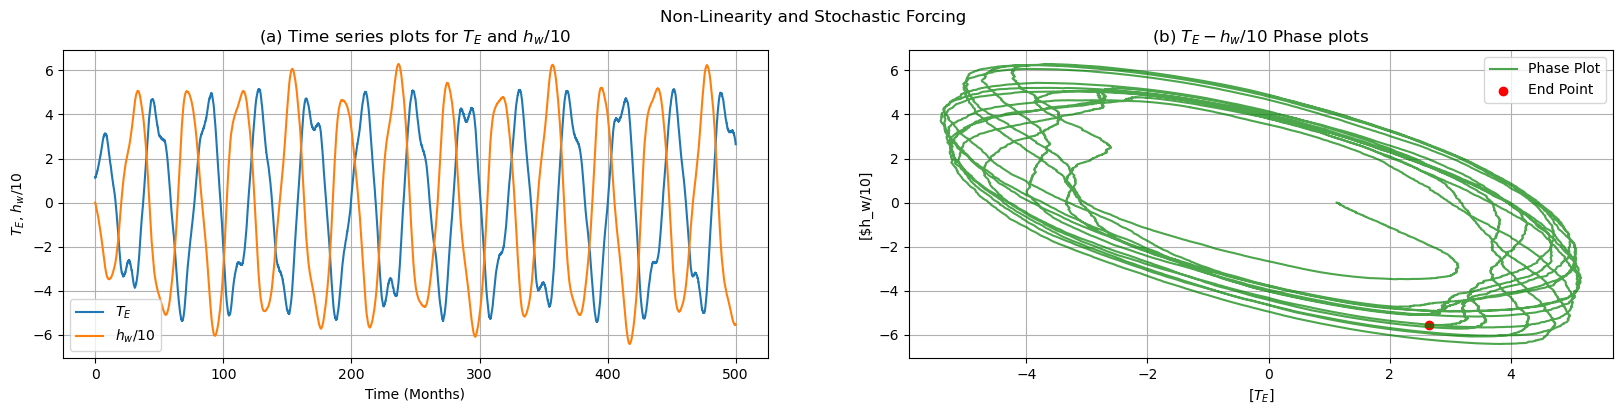

In [8]:
endTime=500/t_nd
dt=(1/30)/t_nd
nt=int(endTime/dt)
time=np.linspace(0,endTime,nt) *t_nd # time array, dimentionalised
en=0.1
mu_0=0.75
T,h=RKplots(time,'Non-Linearity and Stochastic Forcing',nt,dt,T_nd,h_nd,t_nd,E1,E2,mu,mu_0,en,varymu=True,varyE1=True)

We run the model with similar paratmeters to Task E, except we turn ON the nonlinearity ($e_n=0.1$) and set $\mu_0=0.75$. The initail linear growth is now capped, similar to Task C and D. The annual forcing also creates trends in $T_E$ and $h_w$ similar to those in Task D. But here we can also see the effect of wind stress as random vibrations in the phase trajectory.

### Task G:Testing whether chaotic behaviour can be triggered through addition of  initial condition uncertainty

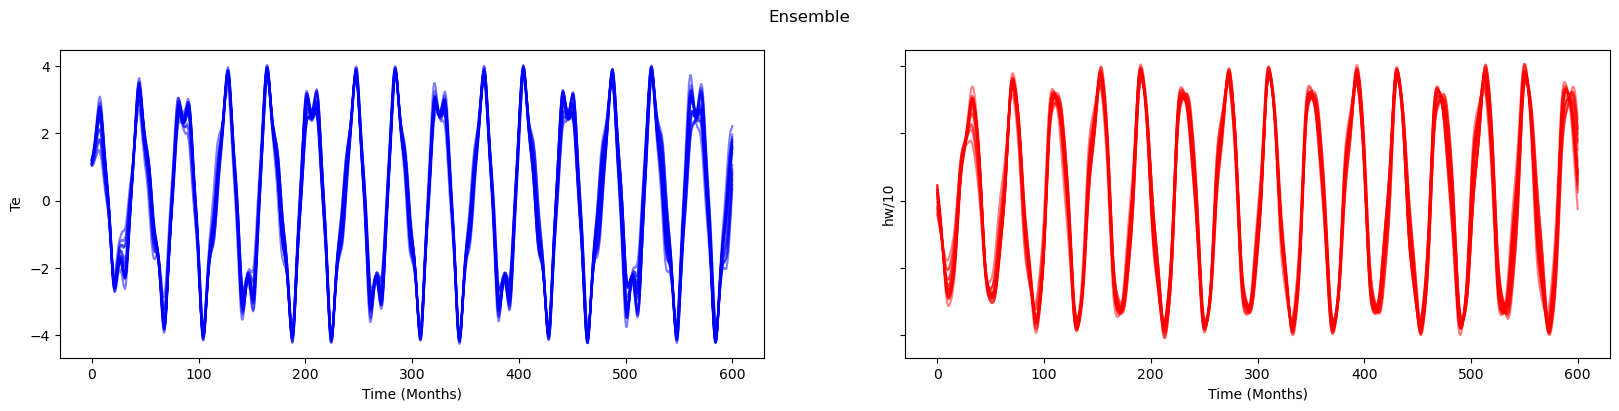

In [9]:
endTime=600/t_nd
nt=5000
dt=endTime/nt
time=np.linspace(0,endTime,nt) *t_nd # time array, dimentionalised
en=0.1
mu_0=0.70
no_en=20  # no of ensemble members
Trange=0.1/T_nd
hrange=5/h_nd
T_purtinit=np.zeros(no_en)
h_purtinit=np.zeros(no_en)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,4), sharey=True)
fig.suptitle('Ensemble')
for i in range(no_en):  
    T_purtinit[i]=Tinit+np.random.uniform(-Trange,Trange)
    h_purtinit[i]=hinit+np.random.uniform(-hrange,hrange)
    Te,hw= RKplots(time,'Time Varying $\mu$',nt,dt,T_nd,h_nd,t_nd,E1,E2,mu,mu_0,en,T_purtinit[i],h_purtinit[i],varymu=True,varyE1=True,purturb=True)
    ax1.plot(time,Te,label='Te',alpha=0.5,color='blue')
    ax2.plot(time,hw/10,label='hw/10',alpha=0.5,color='red')
    ax1.set_xlabel("Time (Months)")
    ax2.set_xlabel("Time (Months)")
    ax1.set_ylabel("Te")
    ax2.set_ylabel("hw/10")


#### Setup
We create an ensemble by perturbing the intial conditions to check if the model is chaotic, meaning if it deviates significantly from the unperturbed system if a small external forcing is introduced. A 20 member ensemble is created with $T_E,initial$ in range $1.125\pm 0.1 K$ and $h_w,initial$ in the range $0\pm 5 m$. Values in the given ranges are chosen at random for every member of the ensemble. Nonlinearity is ON, and annual and stochastic wind forcings are applied. 
#### Discussion
The purturbations to intial conditions only produce small, temporary deviations in some members of the ensemble. All memebrs show characteristics similar to the system modelled in Task F. Deviation of ensemble members from reference state are visible following places on the plots where effects of external forcings like annual forcing and random wind stress are prominent, but deviations go away. This also shows that the system is not sensitive to periodic or ramndom external forcings applied after initial time.

### Appendix: RK4
The coupled Equations (1) and (2) can be re-written as-
\begin{equation}
\frac{d}{dt} \begin{bmatrix} T \\ h \end{bmatrix} = \begin{bmatrix} RT + \gamma h - \epsilon (h + bT)^3 + \gamma\xi_1 + \xi_2 \\ -rh_w - \alpha bT_E - \alpha\xi_1 \end{bmatrix} = F(\begin{bmatrix} T \\ h \end{bmatrix}, t, \dots)
\end{equation}

The RK4 soltion is thne given by-
\begin{equation}T^{n+1}= T^n + \Delta t(k_1 + 2k_2 + 2k_3 + k_4) \end{equation}
and \begin{equation}h^{n+1}= h^n + \Delta t(l_1 + 2l_2 + 2l_3 + l_4) \end{equation}
, where the super script $n$ denotes the value at $n^{th}$ time step. The coefficeints $k_i$ and $l_i$ are calculated at-

\begin{equation}
\begin{bmatrix} k_1 \\ l_1 \end{bmatrix}= F(\begin{bmatrix} T^n \\ h^n \end{bmatrix}, t, \Delta t, \mu,\dots)
\end{equation}
\begin{equation}
\begin{bmatrix} k_2 \\ l_2 \end{bmatrix}= F(\begin{bmatrix} T^n + {k_1\Delta t}/2 \\ h^n+ {l_1\Delta t}/2 \end{bmatrix}, t+\Delta t/2, \Delta t, \mu,\dots)
\end{equation}
\begin{equation}
\begin{bmatrix} k_3 \\ l_3 \end{bmatrix}= F(\begin{bmatrix} T^n + {k_2\Delta t}/2 \\ h^n+ {l_2\Delta t}/2 \end{bmatrix}, t+\Delta t/2, \Delta t, \mu,\dots)
\end{equation}
\begin{equation}
\begin{bmatrix} k_4 \\ l_4 \end{bmatrix}= F(\begin{bmatrix} T^n + {k_3\Delta t} \\ h^n+ {l_3\Delta t} \end{bmatrix}, t+\Delta t, \Delta t, \mu,\dots)
\end{equation}


### References

Jin, F.-F. (1997a). An equatorial ocean recharge paradigm for ENSO: Part I: Conceptual
 model. J. Atmos. Sci., 54, 811–829 

Jin, F.-F. (1997b). An equatorial ocean recharge paradigm for ENSO: Part II: A stripped
down coupled model. J. Atmos. Sci., 54, 830–847.